
# Project: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In This Project We will be analyzing data regarding 100K medical appointments varying between show and no show in brazil to realize what trends and factors affect their ability to show up So our main question will be What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>


In [119]:
! pip install pandas==0.25

     |████████████████████████████████| 10.4MB 17.1MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [1]:
# in this cell we include all of our imports (numpy,pandas,matblotlib,seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Read CSV Data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Show Data Head
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Performing pandas quick analaysis
profile = ProfileReport(df)
profile

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,110527
Total Missing (%),0.0%
Total size in memory,11.8 MiB
Average record size in memory,112.0 B
Numeric,4
Categorical,5
Boolean,5
Date,0
Text (Unique),0
Rejected,0


In [4]:
#Checking The Shape
df.shape

(110527, 14)

In [5]:
#Getting a Brief Summary Of Our Data Set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Getting More Info (Null & data type of each coloumn)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:3

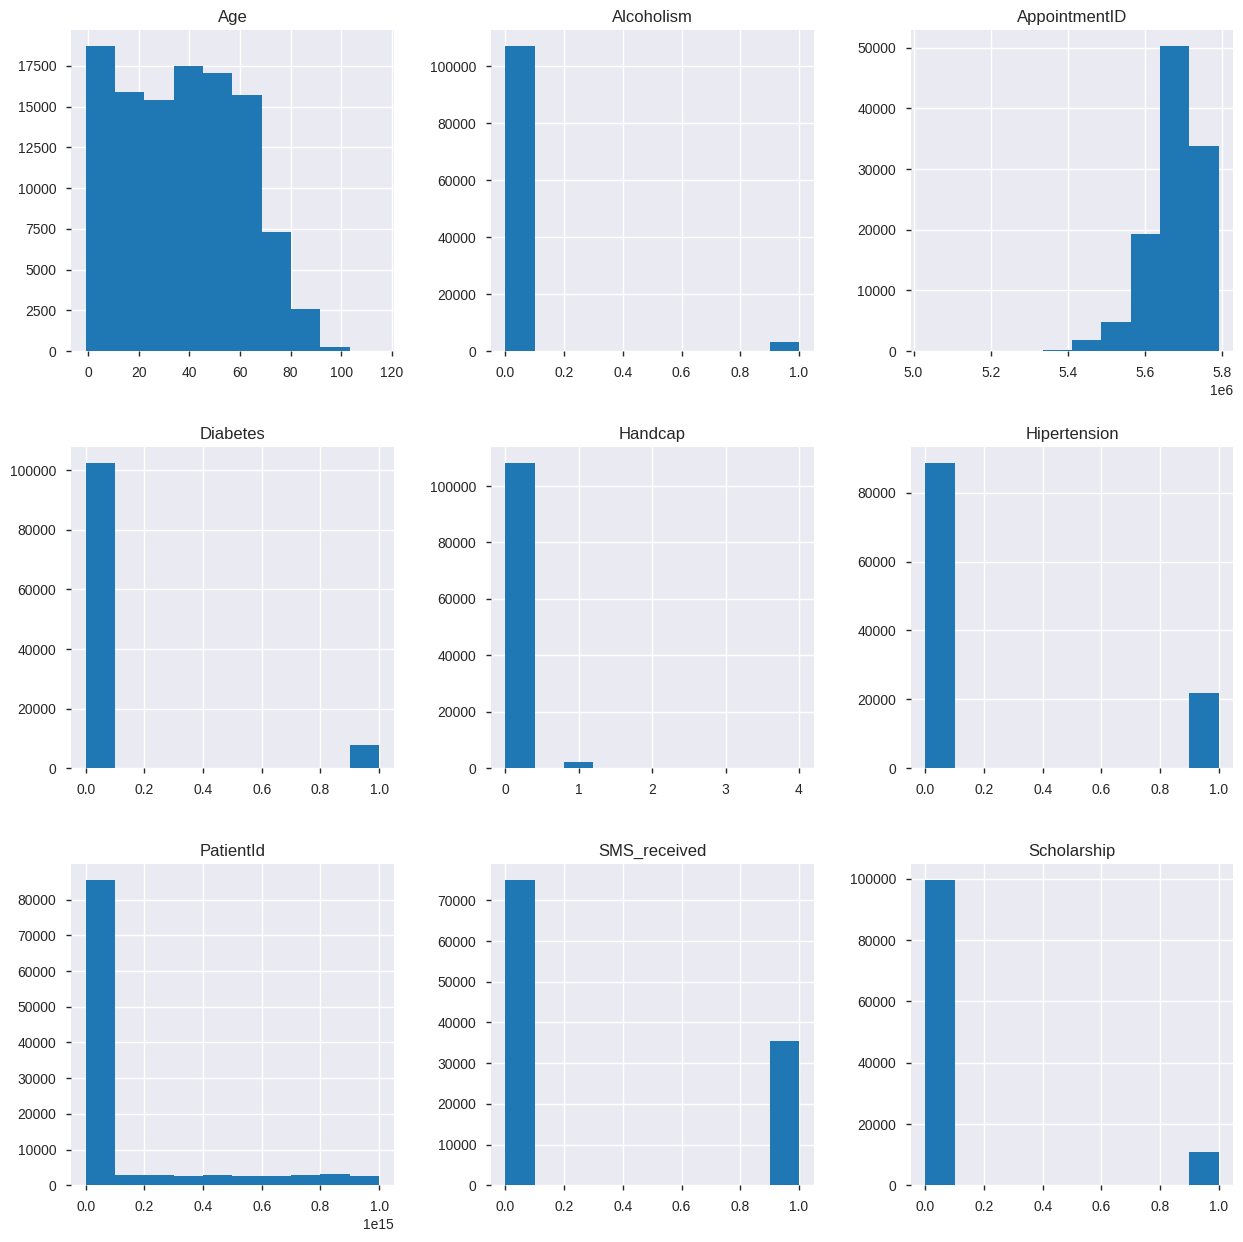

In [7]:
#visualising our data to get a visual overview
df.hist(figsize=(15, 15));

Here we notice that :

>1- we have null values in the age column also some ages are in the negative values which makes no sense 

>2- we also notice that the max value for handicap column is 4 which makes no sense since the value should either be 0 as not handicapped or 1 as handicapped (classifier indecator) not an actual value

>3- patient id , appointment id  won't really matter to our data analysis as they are very specific or non relatable or correlatable data or can't cause a differance in the patients ability to show or not 

>4- we also notice that the handcap column need to be renamed from handcap to handicap




### Data Cleaning (Replace this with more specific notes!)

In [8]:
#Dropping ['PatientId','AppointmentID'] 
df.drop(['PatientId','AppointmentID'], axis=1 , inplace=True)

In [9]:
#Checking if our drop has been performed succesfully 
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#Changing shceduled day and appointment day columns from string to date format

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['Appointment_month'] = df['AppointmentDay'].dt.month
df['Appointment_day'] = df['AppointmentDay'].dt.day_name()
df['Appointment_hour'] = df['AppointmentDay'].dt.hour

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['Scheduled_month'] = df['ScheduledDay'].dt.month
df['Scheduled_day'] = df['ScheduledDay'].dt.day_name()
df['Scheduled_hour'] = df['ScheduledDay'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
Gender               110527 non-null object
ScheduledDay         110527 non-null datetime64[ns, UTC]
AppointmentDay       110527 non-null datetime64[ns, UTC]
Age                  110527 non-null int64
Neighbourhood        110527 non-null object
Scholarship          110527 non-null int64
Hipertension         110527 non-null int64
Diabetes             110527 non-null int64
Alcoholism           110527 non-null int64
Handcap              110527 non-null int64
SMS_received         110527 non-null int64
No-show              110527 non-null object
Appointment_month    110527 non-null int64
Appointment_day      110527 non-null object
Appointment_hour     110527 non-null int64
Scheduled_month      110527 non-null int64
Scheduled_day        110527 non-null object
Scheduled_hour       110527 non-null int64
dtypes: datetime64[ns, UTC](2), int64(11), object(5)
memory usage: 15.2+ MB


In [11]:
# Creating ScheduledDate to calculate waiting time
df['ScheduledDate'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date
df['ScheduledDate'].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: ScheduledDate, dtype: object

In [12]:
#converting ScheduledDaTe and AppointmentDay to datetime64 to get wating time
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [13]:
#Calculating Wait Time Between scheduling and appointment
df['waiting_time']= (df['AppointmentDay']-df['ScheduledDate']).dt.days

In [14]:
#Dropping rows with negative values in waiting_time 
df = df[(df.waiting_time >= 0) & (df.waiting_time <= 180)]

#Now we are going drop any value that is less than 1 or more than 100 in the age column since it's impossible to have people of age 0 or less and the ages of 98+ are very rare occasions that simply indicate that they are either missinfo or even if they are correct they will skew our results  and also going to drop any row that have values more than 1 in the handicap column since the value should either be 0 for false or 1 for true and i've notices that there are values more than 1


In [15]:
df = df[(df.Age >= 1) & (df.Age <= 98)]
df = df[(df.Handcap <= 1) & (df.Handcap <= 1)]

In [16]:
#Checking our data again
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_month,Appointment_day,Appointment_hour,Scheduled_month,Scheduled_day,Scheduled_hour,ScheduledDate,waiting_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday,0,4,Friday,18,2016-04-29,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,Friday,0,4,Friday,16,2016-04-29,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,Friday,0,4,Friday,16,2016-04-29,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,Friday,0,4,Friday,17,2016-04-29,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,Friday,0,4,Friday,16,2016-04-29,0


<a id='eda'></a>
## Exploratory Data Analysis



### Which Variables Affect Show/noshow values ?

In [17]:
# Checking if waiting time affects show/noshow
total = df.waiting_time.values
print('Mean:', np.mean(total))
print('Standard deviation:', np.std(total))
print('Minimum:', np.min(total))
print('Maximum:', np.max(total))
print('Median:', np.median(total))

Mean: 10.170711148158208
Standard deviation: 15.266786860825293
Minimum: 0
Maximum: 179
Median: 4.0


Text(0.5, 0, 'number of patients')

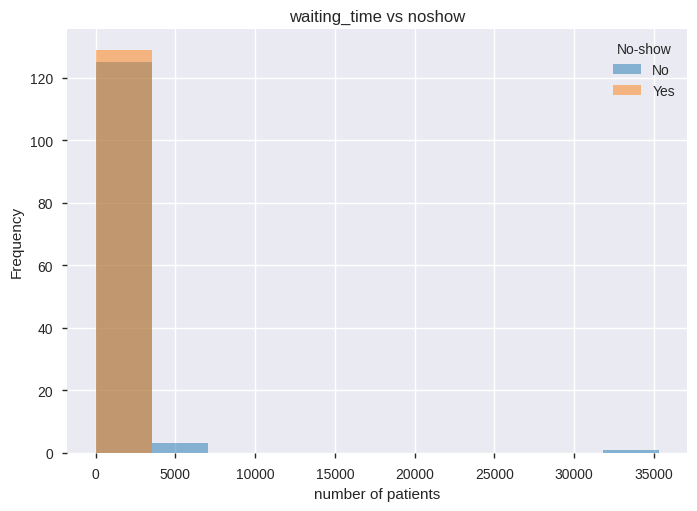

In [18]:
pd.crosstab(df['waiting_time'],df['No-show']).plot(kind='hist',alpha=0.5);
plt.title('waiting_time vs noshow')
plt.xlabel('number of patients')

#This clearly shows that the longer the waiting time is the higher the no show counts are as we an see on waiting times higher than 10 most people don't show up

In [19]:
#Performing Another pandas quick analysis
profile = ProfileReport(df)
profile

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,21
Number of observations,106771
Total Missing (%),0.0%
Total size in memory,17.1 MiB
Average record size in memory,168.0 B
Numeric,6
Categorical,6
Boolean,6
Date,2
Text (Unique),0
Rejected,1


Text(0.5, 0, 'frequency')

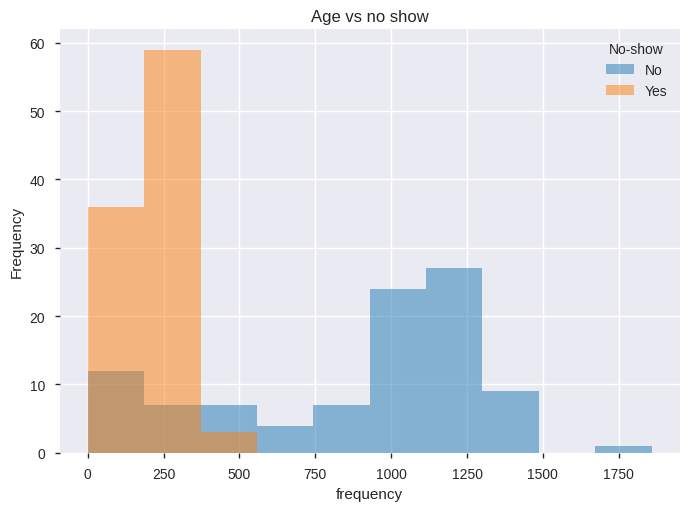

In [20]:
#plotting relationship between age and no-show data
pd.crosstab(df['Age'],df['No-show']).plot(kind='hist',alpha=0.5);
plt.title('Age vs no show')
plt.xlabel('frequency')

In [21]:
# Calculating the mean/median and max value of agees of people who didn't show up
df_noshow=df[df['No-show']=='No']
print(df_noshow.Age.mean())
print(df_noshow.Age.median())
print(df_noshow.Age.max())

39.0568710359408
39.0
98


#This indicates that most people who are of age 39 or higher have a tendancy to not show up 


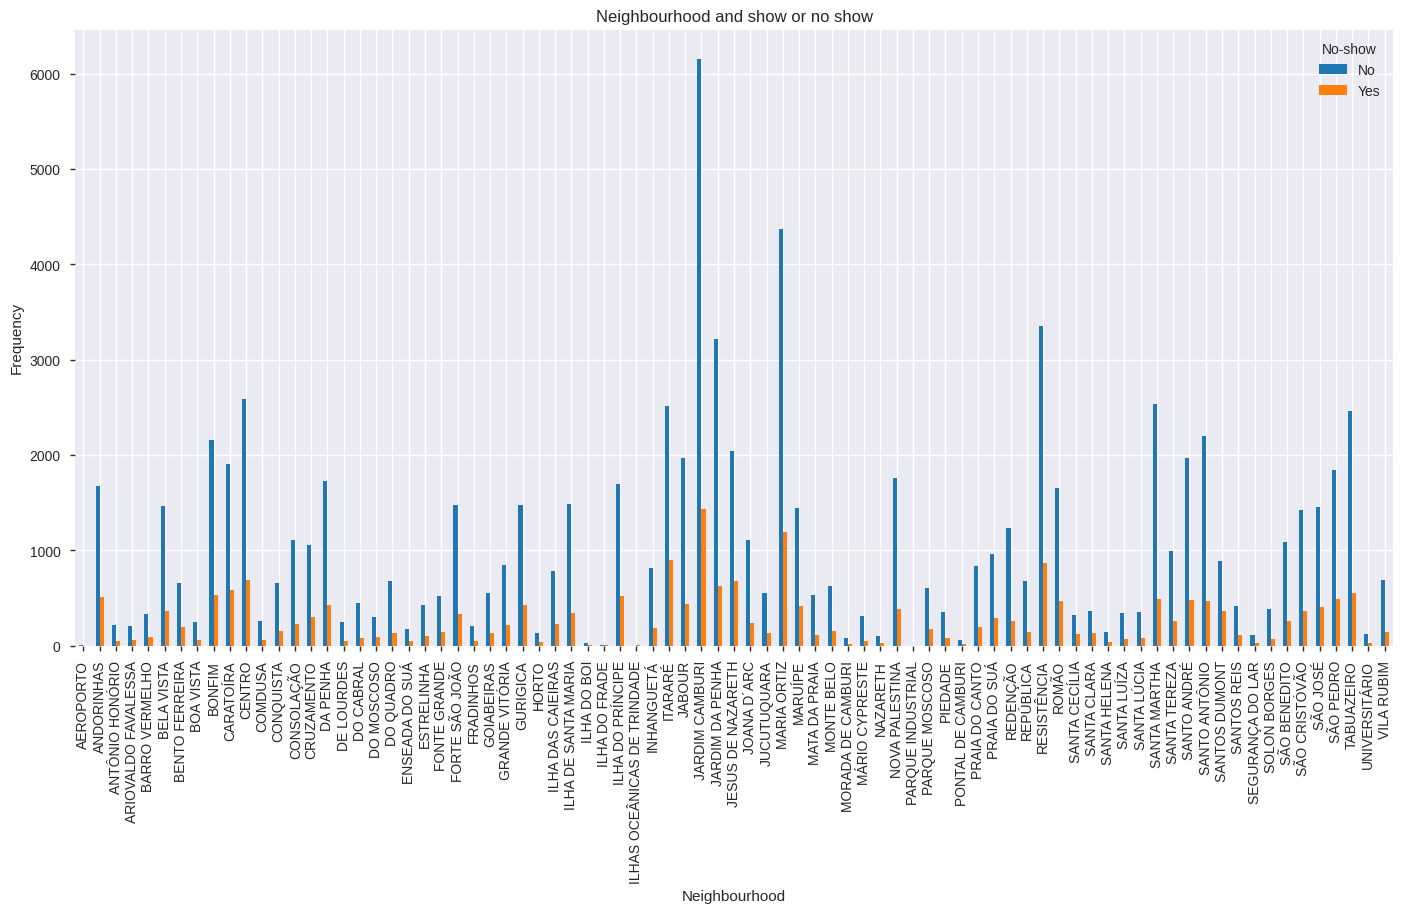

In [22]:
# PLotting relationship between nieghbbourhood and show data
pd.crosstab(df['Neighbourhood'],df['No-show']).plot(kind='bar',figsize=(17,8));
plt.title('Neighbourhood and show or no show')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency');

#Jardim Camburi seems to be the most scheduled and showed up hospital 

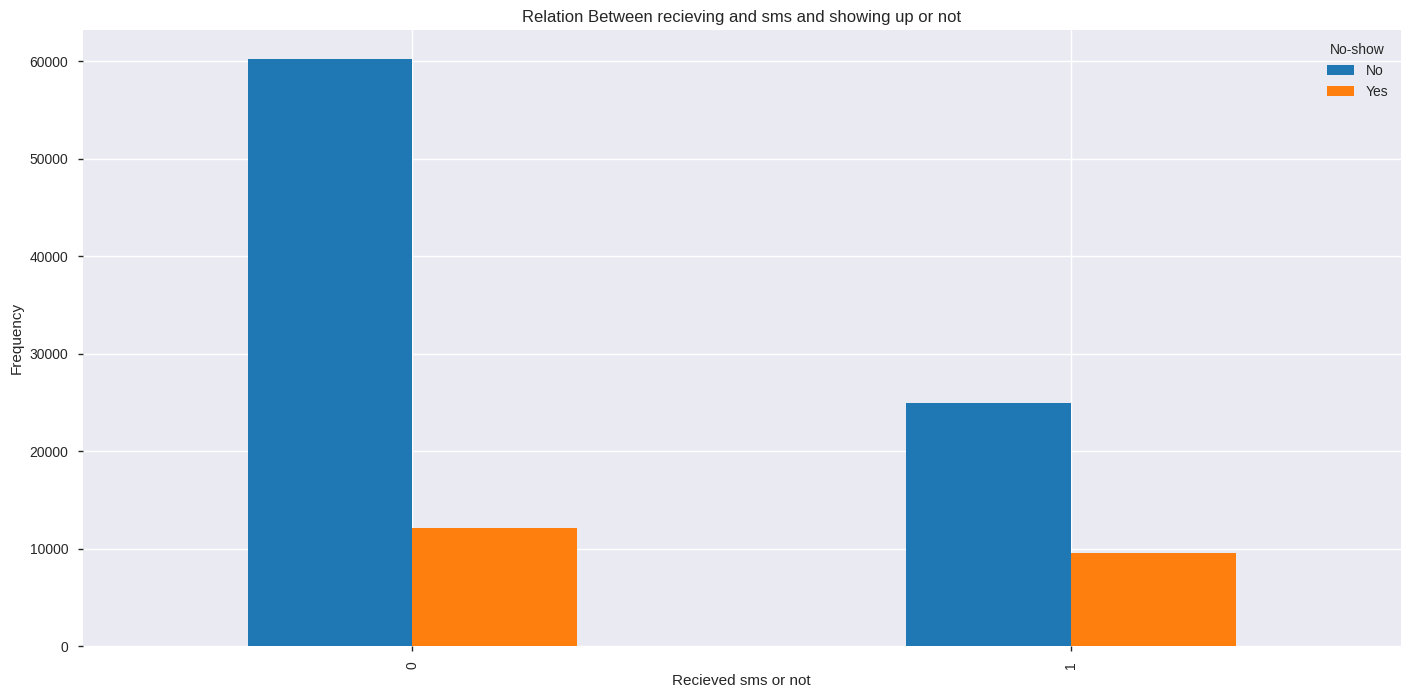

In [23]:
pd.crosstab(df['SMS_received'],df['No-show']).plot(kind='bar',figsize=(17,8));
plt.title('Relation Between recieving and sms and showing up or not')
plt.xlabel('Recieved sms or not')
plt.ylabel('Frequency');

#we can see that recieving an sms didn't affect the show or no show factor

#It was obvious from the basic histogram graph analysis on the main dataset even before cleaning that most other variables won't affect our show or no show values how ever i decided to make sure graphicaly and statistacly so i ran a generic code on the remaining factors which are Gender , Scholarship , diabetes , alcholism , hypertension , handicap and we did prove no co-relation exists.

In [27]:
# checking if gender affected showing or not showing up
df_No_show_Gender = df[["Gender","No-show"]]
df_No_show_Gender = df_No_show_Gender
df_No_show_Gender.head()
show_bygender = df['Gender'].loc[df['No-show'] == 'No']
no_show_bygender = df['Gender'].loc[df['No-show'] == 'Yes']

In [28]:
df_No_show_Gender.describe()

,Gender,No-show
count,106771,106771
unique,2,2
top,F,No
freq,69996,85140


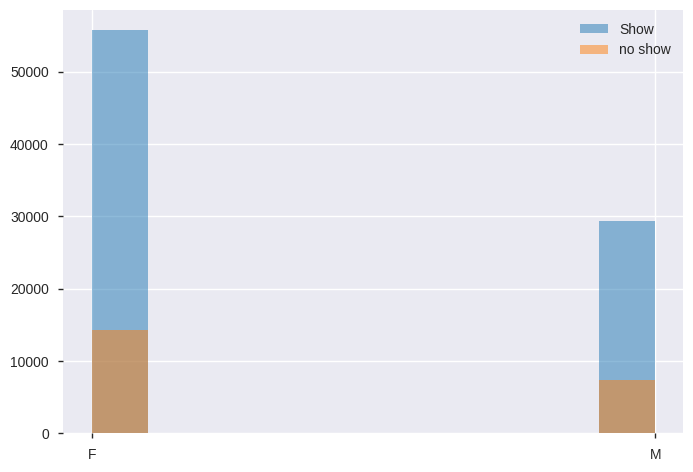

In [29]:
# plotting gender relation 
show_bygender.hist(alpha=0.5, label='Show')
no_show_bygender.hist(alpha=0.5, label='no show')
plt.legend();

In [32]:
# scholar ship analysis
df_No_show_Scholarship = df[["Scholarship","No-show"]]
df_No_show_Scholarship = df_No_show_Scholarship
df_No_show_Scholarship.head()

,Scholarship,No-show
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No


In [33]:
df_No_show_Scholarship.describe()

,Scholarship
count,106771.000000
mean,0.101067
std,0.301419
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [34]:
show_byScholarship = df['Scholarship'].loc[df['No-show'] == 'No']
no_show_byScholarship = df['Scholarship'].loc[df['No-show'] == 'Yes']

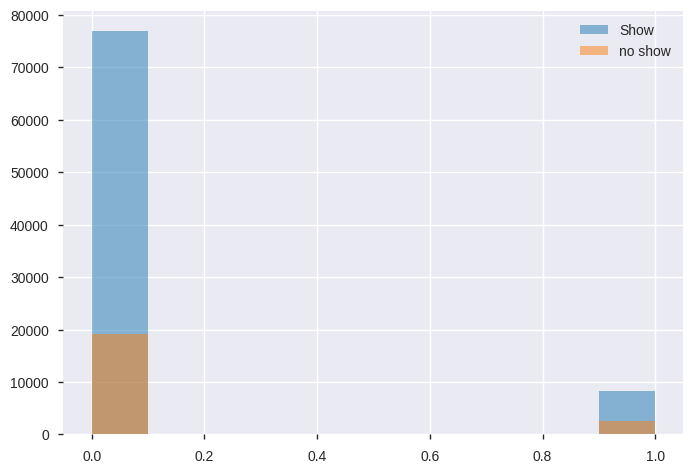

In [35]:
show_byScholarship.hist(alpha=0.5, label='Show')
no_show_byScholarship.hist(alpha=0.5, label='no show')
plt.legend();

In [36]:
# hyper tension analysis
df_No_show_Hipertension = df[["Hipertension","No-show"]]
df_No_show_Hipertension = df_No_show_Hipertension
df_No_show_Hipertension.head()

,Hipertension,No-show
0,1,No
1,0,No
2,0,No
3,0,No
4,1,No


In [37]:
show_byHipertension = df['Hipertension'].loc[df['No-show'] == 'No']
no_show_byHipertension = df['Hipertension'].loc[df['No-show'] == 'Yes']

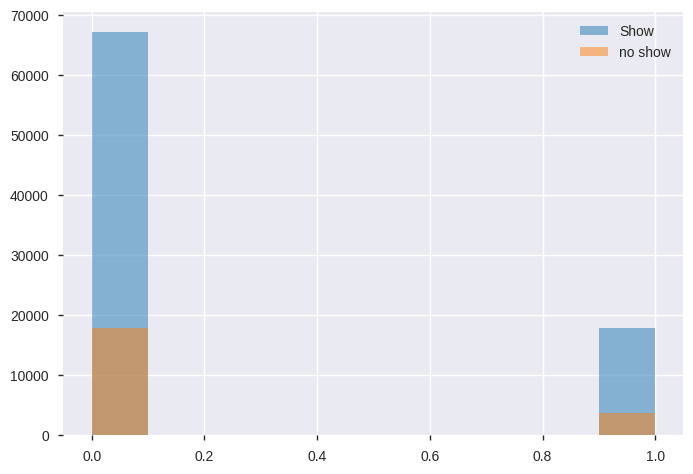

In [38]:
show_byHipertension.hist(alpha=0.5, label='Show')
no_show_byHipertension.hist(alpha=0.5, label='no show')
plt.legend();

In [39]:
# diabetes analysis 
df_No_show_Diabetes = df[["Diabetes","No-show"]]
df_No_show_Diabetes = df_No_show_Diabetes
df_No_show_Diabetes.head()

,Diabetes,No-show
0,0,No
1,0,No
2,0,No
3,0,No
4,1,No


In [40]:
show_byDiabetes = df['Diabetes'].loc[df['No-show'] == 'No']
no_show_byDiabetes = df['Diabetes'].loc[df['No-show'] == 'Yes']

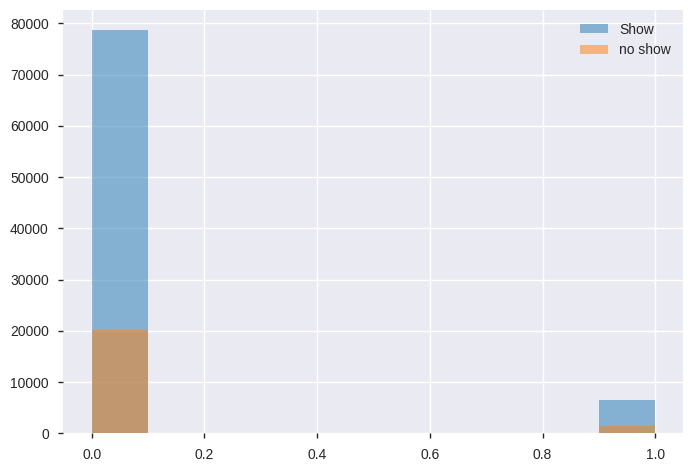

In [41]:
show_byDiabetes.hist(alpha=0.5, label='Show')
no_show_byDiabetes.hist(alpha=0.5, label='no show')
plt.legend();

In [42]:
# alcholism analysis 
df_No_show_Alcoholism = df[["Alcoholism","No-show"]]
df_No_show_Alcoholism = df_No_show_Alcoholism
df_No_show_Alcoholism.head()

,Alcoholism,No-show
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No


In [43]:
show_byAlcoholism = df['Alcoholism'].loc[df['No-show'] == 'No']
no_show_byAlcoholism = df['Alcoholism'].loc[df['No-show'] == 'Yes']

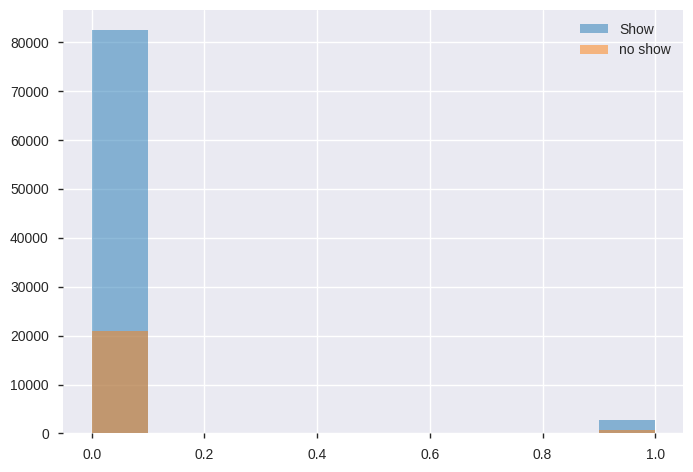

In [44]:
show_byAlcoholism.hist(alpha=0.5, label='Show')
no_show_byAlcoholism.hist(alpha=0.5, label='no show')
plt.legend();

In [45]:
# handi cap analysis
df_No_show_Handcap = df[["Handcap","No-show"]]
df_No_show_Handcap = df_No_show_Handcap
df_No_show_Handcap.head()

,Handcap,No-show
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No


In [46]:
show_byHandcap = df['Handcap'].loc[df['No-show'] == 'No']
no_show_byHandcap = df['Handcap'].loc[df['No-show'] == 'Yes']

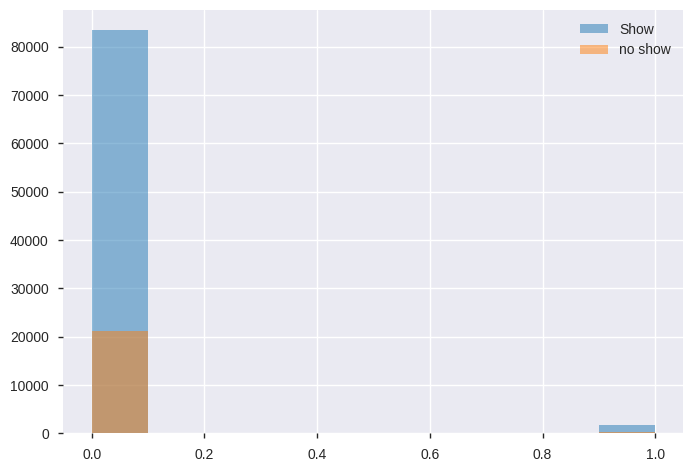

In [47]:
show_byHandcap.hist(alpha=0.5, label='Show')
no_show_byHandcap.hist(alpha=0.5, label='no show')
plt.legend();

#Conclusion of first research question is that Age , Waiting time and Neighbourhood do have a coleration with show/noshow values as:
>1- most people of Age 39+ have a tendancy to not show up 

>2- Jardim Camburi seems to be the most scheduled for and showed up hospital followed up by Maria Ortiz

>3- Waiting time seems to be the most effective variable in determining wither people are going to show up or not as indicated that waiting times higher than 10 ( average waiting time ) tend to not show up

### Does Waiting Time Vary based on Nieghbourhood or vice versa ?

#we need to first define waiting time into different categories and group them in order to be able to visualize neighbourhood and waiting time no show effects so we will use cut method 

In [51]:
# grouping waiting time by no show
waiting_time = df.groupby(by=['waiting_time','No-show'])
waiting_time = waiting_time.count()['Neighbourhood'].unstack()
waiting_time.fillna(value=0, inplace=True)
waiting_time.reset_index(drop=False, inplace=True)
# categorizing waiting time into groups using cut method
categories = pd.Series(['Same day: 0', 'Short waiting time: 1-3', 'Long waiting time: 4-7', 'over a week: 8-15', '2weeks-month: 16-30', '1-3month: 31-90', '3-6month: 91-180'])
waiting_time['waiting_time'] = pd.cut(waiting_time.waiting_time, bins = [-1,0,3,7,15,30,90,180], labels=categories)
df['WaitingCategories'] = pd.cut(df.waiting_time, bins = [-1,0,3,7,15,30,90,180], labels=categories)
# Grouping the df by the waiting categories to return the sum of all instances:
waiting_time = waiting_time.groupby('waiting_time').sum()
#turning waiting time into rate
waiting_time['No-showing rate'] = (waiting_time.Yes / waiting_time.No)*100

In [52]:
# grouping nieghbourhood by waiting time
neighbors = df.groupby(by=['Neighbourhood','No-show']).WaitingCategories.value_counts().sort_index()
#transofrming into dataset
neighbors = neighbors.unstack(1).unstack()
#replacing nan values with 0 for calculations and representation
neighbors.fillna(value=0, inplace=True)
neighbors.head()

No-show                          No  ...               Yes
WaitingCategories   1-3month: 31-90  ... over a week: 8-15
Neighbourhood                        ...                  
AEROPORTO                       1.0  ...               0.0
ANDORINHAS                     66.0  ...             118.0
ANTÔNIO HONÓRIO                27.0  ...               4.0
ARIOVALDO FAVALESSA             4.0  ...               6.0
BARRO VERMELHO                  2.0  ...              29.0

[5 rows x 14 columns]

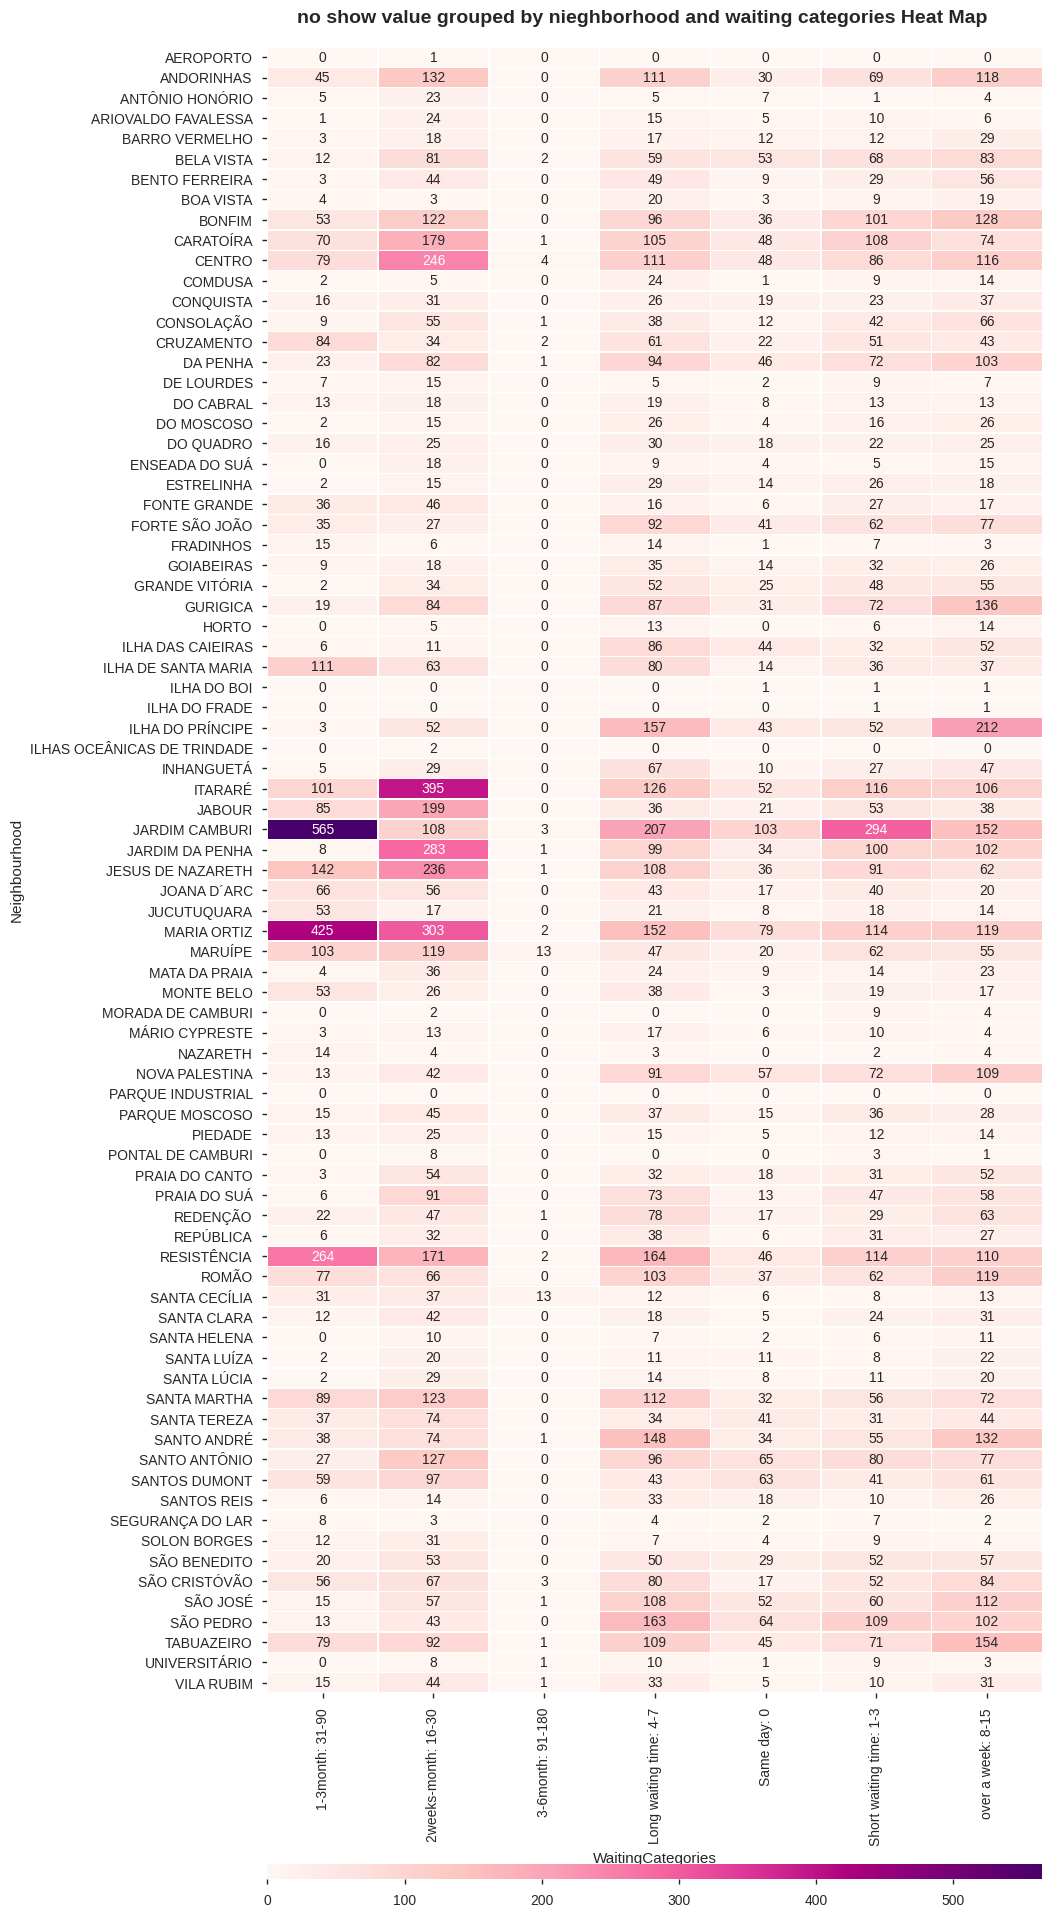

In [53]:
#changing neighbors data type to int for plotting
neighbors = (neighbors).astype('int64')
#only keeping no show data
neighbors = neighbors['Yes']
#plotting  aheat map
fig, ax = plt.subplots(figsize=(10, 25))
fig.subplots_adjust(top=.965)
plt.suptitle('no show value grouped by nieghborhood and waiting categories Heat Map', fontsize=14, fontweight='bold')
cbar_kws = {'orientation':"horizontal", 'pad':0.08, 'aspect':50}
sns.heatmap(neighbors, annot=True, fmt='d', linewidths=.3, ax=ax, cmap='RdPu', cbar_kws=cbar_kws);

#from the heatmap above that in general the no-show value increases as the waiting gets longer for most of neighborhood

<a id='conclusions'></a>
## Conclusions



#Limitations:
>1- data has no description of how it was aqquired

>2- data was not clean enough and some values made no sense indicating there was either an error with systems or in the gathering process

>3- some data would of made it easier to get conclusions like if the patient has ever been to that hospital before or the quality of the hospital it self

#we conclude from patterns , heatmaps, and histograms and some statistical analysis that :

>1- showing or not showing depends on : 
a-Age.
b-waiting time.
c-hospital

>2-waiting time affects hospitals show/noshow rates 


#Notes:
>1- i've made sure to use different pieces of code and built in libraries every once ina while to show multiple ways for solving the same issues

>2- some solutions for some pieces of codes that kept producing errors where a result of searching over the internet so not all of my codes are 100% unique 

>3- there are some warnings not errors regarding some plots and the pandas quick analysis method due to different kernals and pandas and python versions between google collab and jupytr as i have been working on both but nothing that affected the results or is of any significance